# 분류모형의 평가
   
* Confusion Matrix
* Accuracy, Precision, Recall, F1
* ROC, AUC

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(solver='liblinear', random_state=1))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('테스트 정확도: %.3f' % pipe_lr.score(X_test, y_test))

테스트 정확도: 0.965


# confusion matrix
분류 모형의 성능을 평가한다.
confusion_matrix 함수를 사용한다.

In [ ]:
from sklearn.metrics import confusion_matrix

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[ 60   4]
 [  2 105]]


###  Accuracy, Precision, Recall, f1

* Accuracy : 정확도. 단순히 정확히 예측한 샘플의 비율 (TP+TN) / (TP+TN+FP+FN)
* Precision : 정밀도. 양성으로 예측한 샘플 중 진짜 양성 클래스의 비율, 예측 노이즈 (TP) / (TP+FP)
* Recall : 재현율, 진짜 양성 샘플 중에서 양성으로 예측한 비율, 양성 샘플을 구분하는 능력 (TP) / (TP+FN)
* f1 : 정밀도와 재현율의 조화평균, 2 * (정밀도*재현율) / (정밀도+재현율), 진짜 양성 레이블을 가진 샘플을 양성으로 성공적으로 예측한 정도를 측정


클래스가 불균형하면 모델의 정확도는 높지만 예측 성능이 나쁜 역설적인 상황도 발생할 수 있다.  
예를 들어 매우 희귀한 암의 발병률이 0.1%라고 하자. 이 경우 단순히 아무도 암에 걸리지 않았다고 예측하는 모형은 정확도가 99.9%가 될 수도 있다. 이 경우 f1 score가 좀 더 정확한 성능 지표가 된다.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('정밀도(Positive Predictive Value): %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('재현율(sensitivity, True Positive Rate): %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('정확도: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print('F1 Score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

정밀도(Positive Predictive Value): 0.963
재현율(sensitivity, True Positive Rate): 0.981
정확도: 0.965
F1 Score: 0.972


### classification_report

평가 지표의 요약 정보를 확인한다.
* classification_report
    * macro: 단순평균
    * weighted: 각 클래스에 속하는 표본의 갯수로 가중평균
    * accuracy: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율.
    * support: 각 클래스에 속한 샘플의 개수

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Malignant 0', 'Benign 1']))

              precision    recall  f1-score   support

 Malignant 0       0.97      0.94      0.95        64
    Benign 1       0.96      0.98      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



# Multi-class 일 경우


In [ ]:
y_test_1 = [0,1,2,2,0,1,2] # actual
y_pred_1 = [0,1,2,2,1,2,1] # predicted

In [ ]:
confusion_matrix(y_true=y_test_1, y_pred=y_pred_1)

array([[1, 1, 0],
       [0, 1, 1],
       [0, 1, 2]])

**예를 들어 precision_score를 계산해 보자.**  
precision = TP/(TP+FP)

In [ ]:
# average=None 일때, 각 class 별로 precision을 계산한다.
precision_score(y_test_1, y_pred_1, average=None)

array([1.        , 0.33333333, 0.66666667])

In [ ]:
# average='macro' 일때, average=None으로 계산된 각 class별 precision의 산술평균
# precision_score(y_test_1, y_pred_1, average=None).mean()
precision_score(y_test_1, y_pred_1, average='macro')

0.6666666666666666

In [ ]:
# average='micro' 일때, 각 class별 TP의 합, FP의 합으로 계산한다.
precision_score(y_test_1, y_pred_1, average='micro')

0.5714285714285714

# ROC, AUC

* ROC(Receiver Operating Chracteristic) : 분류 모형의 FPR과 TPR 점수를 기반으로 분류 모형의 성능을 비교 할 때 유용하다.
* AUC(Area Under the Curve) : ROC 그래프의 아래 면적, 1에 가까울 수록 좋은 모형이다.

In [ ]:
from sklearn.metrics import roc_curve, auc

probas = pipe_lr.fit(X_test, y_test).predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test,
                                     probas[:, 1],
                                     pos_label=1)
fpr, tpr, thresholds

(array([0.      , 0.      , 0.      , 0.015625, 0.015625, 0.03125 ,
        0.03125 , 1.      ]),
 array([0.        , 0.00934579, 0.95327103, 0.95327103, 0.98130841,
        0.98130841, 1.        , 1.        ]),
 array([1.99999991e+00, 9.99999908e-01, 8.14788424e-01, 7.68524204e-01,
        6.68876254e-01, 6.20070112e-01, 5.04803673e-01, 2.81312139e-10]))

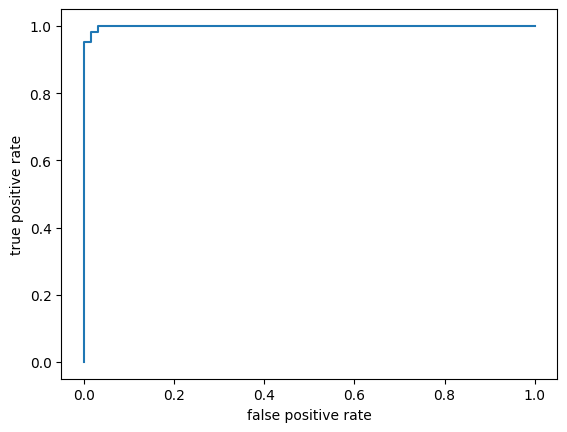

In [ ]:
plt.plot(fpr, tpr)

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [ ]:
roc_auc = auc(fpr, tpr)
print('AUC : %.3f' % roc_auc)

AUC : 0.994


## 실습하기
1. sklearn의 wine 데이터를 다음과 같이 읽어들이시오.
```
from sklearn.datasets import load_wine
data = load_wine()
x = data.data
y = data.target
```

2. 읽어들인 데이터를 사용하여 와인의 종류를 분류하는 분류모형을 생성하시오.
3. 분류 모형을 평가하시오.(Accuracy, Recall, Precision, ROC/AUC 등)